In [1]:
from sklearn.datasets import load_digits

In [5]:
digits = load_digits()

In [6]:
digits.data

array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ..., 10.,  0.,  0.],
       [ 0.,  0.,  0., ..., 16.,  9.,  0.],
       ...,
       [ 0.,  0.,  1., ...,  6.,  0.,  0.],
       [ 0.,  0.,  2., ..., 12.,  0.,  0.],
       [ 0.,  0., 10., ..., 12.,  1.,  0.]])

In [7]:
digits

{'data': array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ..., 10.,  0.,  0.],
        [ 0.,  0.,  0., ..., 16.,  9.,  0.],
        ...,
        [ 0.,  0.,  1., ...,  6.,  0.,  0.],
        [ 0.,  0.,  2., ..., 12.,  0.,  0.],
        [ 0.,  0., 10., ..., 12.,  1.,  0.]]),
 'target': array([0, 1, 2, ..., 8, 9, 8]),
 'frame': None,
 'feature_names': ['pixel_0_0',
  'pixel_0_1',
  'pixel_0_2',
  'pixel_0_3',
  'pixel_0_4',
  'pixel_0_5',
  'pixel_0_6',
  'pixel_0_7',
  'pixel_1_0',
  'pixel_1_1',
  'pixel_1_2',
  'pixel_1_3',
  'pixel_1_4',
  'pixel_1_5',
  'pixel_1_6',
  'pixel_1_7',
  'pixel_2_0',
  'pixel_2_1',
  'pixel_2_2',
  'pixel_2_3',
  'pixel_2_4',
  'pixel_2_5',
  'pixel_2_6',
  'pixel_2_7',
  'pixel_3_0',
  'pixel_3_1',
  'pixel_3_2',
  'pixel_3_3',
  'pixel_3_4',
  'pixel_3_5',
  'pixel_3_6',
  'pixel_3_7',
  'pixel_4_0',
  'pixel_4_1',
  'pixel_4_2',
  'pixel_4_3',
  'pixel_4_4',
  'pixel_4_5',
  'pixel_4_6',
  'pixel_4_7',
  'pixel_5_0',
  'pixel_5_1',
 

In [8]:
from sklearn.svm import SVC
model = SVC()

Support Vector Machines (SVM) is a supervised machine learning algorithm primarily used for classification tasks, but it can also be applied to regression problems. SVM works by finding the hyperplane that best separates different classes in the feature space. This hyperplane is chosen to maximize the margin, which is the distance between the hyperplane and the nearest data point from each class, called support vectors.

Once the hyperplane is found, to classify a new fruit, SVM determines on which side of the hyperplane the point lies. If it's on one side, it's classified as one class (e.g., apple), and if it's on the other side, it's classified as the other class (e.g., orange).

In [9]:
from sklearn.model_selection import train_test_split

In [10]:
X_train, X_test, y_train, y_test = train_test_split(digits.data, digits.target, test_size=0.2)

In [13]:
print(len(X_train))
len(X_test)

1437


360

In [14]:
model.fit(X_train, y_train)

SVC()

In [28]:
X_train

array([[ 0.,  0., 10., ...,  9., 12., 15.],
       [ 0.,  0.,  0., ...,  6.,  0.,  0.],
       [ 0.,  1., 11., ...,  1.,  0.,  0.],
       ...,
       [ 0.,  0.,  9., ...,  5.,  0.,  0.],
       [ 0.,  0.,  0., ...,  2.,  0.,  0.],
       [ 0.,  0.,  6., ..., 15., 16., 16.]])

In [25]:
# Step 3: Get support vectors
support_vectors = model.support_vectors_
print(support_vectors)
print(len(support_vectors))
# Step 4: Get indices of support vectors
support_vectors_indices = model.support_
len(support_vectors_indices)

[[ 0.  2.  0. ... 16.  7.  0.]
 [ 0.  0.  0. ...  7.  0.  0.]
 [ 0.  0.  0. ...  5.  0.  0.]
 ...
 [ 0.  0.  7. ... 11.  0.  0.]
 [ 0.  0. 15. ... 11.  0.  0.]
 [ 0.  0.  0. ...  4.  0.  0.]]
636


636

In [19]:
model.get_params()

{'C': 1.0,
 'break_ties': False,
 'cache_size': 200,
 'class_weight': None,
 'coef0': 0.0,
 'decision_function_shape': 'ovr',
 'degree': 3,
 'gamma': 'scale',
 'kernel': 'rbf',
 'max_iter': -1,
 'probability': False,
 'random_state': None,
 'shrinking': True,
 'tol': 0.001,
 'verbose': False}

In [15]:
model.score(X_test, y_test)

0.9777777777777777

In [16]:
from sklearn import tree
model_tree = tree.DecisionTreeClassifier()

In [17]:
model_tree.fit(X_train, y_train)

DecisionTreeClassifier()

In [18]:
model_tree.score(X_test, y_test)

0.8583333333333333

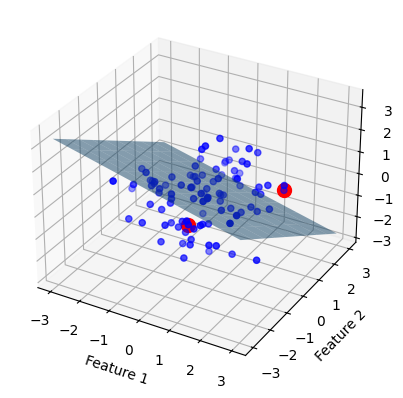

In [21]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Generate random data for demonstration
np.random.seed(0)
num_samples = 100
feature1 = np.random.randn(num_samples)
feature2 = np.random.randn(num_samples)
feature3 = np.random.randn(num_samples)

# Coefficients for the hyperplane equation: ax + by + cz + d = 0
a, b, c = 1, 2, 3
d = -1  # Choose an arbitrary constant for demonstration

# Create a meshgrid for the 3D plot
x = np.linspace(-3, 3, 10)
y = np.linspace(-3, 3, 10)
x, y = np.meshgrid(x, y)

# Calculate the corresponding z values for the hyperplane
z = (-a * x - b * y - d) / c

# Create 3D plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Plot data points
ax.scatter(feature1, feature2, feature3, c='b', marker='o')

# Highlight support vectors (arbitrary selection)
support_vectors = [(feature1[0], feature2[0], feature3[0]), (feature1[1], feature2[1], feature3[1])]  # Example support vectors

# Plot the support vectors
for sv in support_vectors:
    ax.scatter(*sv, c='r', marker='o', s=100)  # Red color for support vectors


# Plot the hyperplane
ax.plot_surface(x, y, z, alpha=0.5)

# Set labels
ax.set_xlabel('Feature 1')
ax.set_ylabel('Feature 2')
ax.set_zlabel('Feature 3')

plt.show()


in this plot, the blue points represent the randomly generated data points in the three-dimensional space, and the semi-transparent surface represents the hyperplane defined by the equation ax+by+cz+d=0. This hyperplane separates the space into two regions. Adjusting the coefficients a,b,c and d will change the orientation and position of the hyperplane. 

In [ ]:
Red dots represents the support vectors